# Packages

In [53]:
from PIL import Image

from os import listdir
from os.path import isdir

import numpy as np

import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.callbacks import (ModelCheckpoint, ReduceLROnPlateau)
from tensorflow.keras import (layers, models, optimizers)
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

# Dataset

In [2]:
def select_image(filename):
    # load image from file
    image = Image.open(filename)
    # convert to RGB, if needed
    image = image.convert('RGB')
    image = image.resize((150,150))
    # convert to array
    return np.asarray(image)

In [3]:
def load_classes(diretorio, classe, imagens, labels):
    # iterando arquivos

    for filename in listdir(diretorio):

        path = diretorio + filename

        try:
            imagens.append(select_image(path))
            labels.append(classe)
        except:
            print("Erro ao ler imagem {}".format(path))

    return imagens, labels

In [4]:
def select_data_set(diretorio):

    imagens = list()
    labels = list()

    for subdir in listdir(diretorio):
        # path
        path = diretorio + subdir + '/'

        if not isdir(path):
            continue
        imagens, labels = load_classes(path, subdir, imagens, labels)

    return imagens, labels

In [54]:
covid_dataset = "dataset/"
imagens, labels  = select_data_set(covid_dataset)
imagens = np.array(imagens) / 255.0  ## convertendo de lista para array
labels = np.array(labels)  ## convertendo de lista para array

In [55]:
labels

array(['normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'covid-19', 'covid-19',
       'covid-19', 'covid-19', 'covid-19', 'covid-19', 'covid-19',
       'covid-19', 'covid-19', 'covid-19', 'covid-19', 'covid-19',
       'covid-19', 'covid-19', 'covid-19', 'covid-19', 'covid-19',
       'covid-19', 'covid-19', 'covid-19', 'covid-19', 'co

In [56]:
encoder = LabelEncoder()
labels = encoder.fit_transform(labels)
labels = to_categorical(labels)

In [58]:
labels

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1

# Model

## Hyperparams

In [11]:
batch_size   = 32
input_shape  = (150, 150, 3)
random_state = 42
alpha        = 1e-5
epoch        = 100

## Callbacks

In [27]:
filepath="transferlearning_weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [29]:
lr_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.1, min_delta=alpha, patience=5, verbose=1)

In [30]:
callbacks = [checkpoint, lr_reduce]

## Data augmentation

In [12]:
(X_train, X_test, y_train, y_test) = train_test_split(imagens, labels, test_size=0.20, stratify=labels, random_state=random_state)

In [14]:
train_datagen = ImageDataGenerator(
        rotation_range=20,
        zoom_range=0.2)

train_datagen.fit(X_train)

data_aug = train_datagen.flow(X_train, y_train, batch_size=batch_size)

## Transfer learning - vgg19

In [15]:
conv_base = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)

In [16]:
conv_base.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [18]:
conv_base.trainable = True
set_trainable = False

for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [19]:
conv_base.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

## Adding new layers to improve accuracy

In [20]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.6))
model.add(layers.Dense(3, activation='softmax'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 4, 4, 512)         20024384  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               65664     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 3

In [22]:
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])

## Model fitting

In [31]:
history = model.fit_generator(
                              data_aug,
                              steps_per_epoch=len(X_train)// batch_size, # parte inteira da divisão
                              validation_data=(X_test, y_test),
                              validation_steps=len(X_test) // batch_size,# parte inteira da divisão
                              callbacks=callbacks,
                              epochs=epoch)



Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
4/4 [==============================] - ETA: 0s - loss: 0.7283 - acc: 0.4793
Epoch 00001: val_acc improved from -inf to 0.58974, saving model to transferlearning_weights.hdf5
4/4 [==============================] - 12s 3s/step - loss: 0.7283 - acc: 0.4793 - val_loss: 0.8428 - val_acc: 0.5897 - lr: 0.0010
Epoch 2/100
4/4 [==============================] - ETA: 0s - loss: 0.4108 - acc: 0.7188
Epoch 00002: val_acc improved from 0.58974 to 0.64103, saving model to transferlearning_weights.hdf5
4/4 [==============================] - 19s 5s/step - loss: 0.4108 - acc: 0.7188 - val_loss: 1.1084 - val_acc: 0.6410 - lr: 0.0010
Epoch 3/100
4/4 [==============================] - ETA: 0s - loss: 0.3259 - acc: 0.7851
Epoch 00003: val_acc improved from 0.64103 to 0.97436, saving model to transferlearning_weights.hdf5
4/4 [==============================] - 18s 5s/step - loss: 0.3259 - acc: 0.7851 - val_loss: 0.0500 -

Epoch 29/100
4/4 [==============================] - ETA: 0s - loss: 0.0725 - acc: 0.9504
Epoch 00029: val_acc did not improve from 0.97436
4/4 [==============================] - 18s 4s/step - loss: 0.0725 - acc: 0.9504 - val_loss: 0.1069 - val_acc: 0.9231 - lr: 1.0000e-08
Epoch 30/100
4/4 [==============================] - ETA: 0s - loss: 0.0545 - acc: 0.9752
Epoch 00030: val_acc did not improve from 0.97436
4/4 [==============================] - 17s 4s/step - loss: 0.0545 - acc: 0.9752 - val_loss: 0.1063 - val_acc: 0.9231 - lr: 1.0000e-08
Epoch 31/100
4/4 [==============================] - ETA: 0s - loss: 0.0885 - acc: 0.9421
Epoch 00031: val_acc did not improve from 0.97436
4/4 [==============================] - 17s 4s/step - loss: 0.0885 - acc: 0.9421 - val_loss: 0.1047 - val_acc: 0.9231 - lr: 1.0000e-08
Epoch 32/100
4/4 [==============================] - ETA: 0s - loss: 0.0667 - acc: 0.9669
Epoch 00032: val_acc did not improve from 0.97436
4/4 [==============================] - 17s

Epoch 58/100
4/4 [==============================] - ETA: 0s - loss: 0.0605 - acc: 0.9587
Epoch 00058: val_acc did not improve from 0.97436

Epoch 00058: ReduceLROnPlateau reducing learning rate to 1.0000001179769417e-14.
4/4 [==============================] - 18s 4s/step - loss: 0.0605 - acc: 0.9587 - val_loss: 0.0802 - val_acc: 0.9487 - lr: 1.0000e-13
Epoch 59/100
4/4 [==============================] - ETA: 0s - loss: 0.0796 - acc: 0.9504
Epoch 00059: val_acc did not improve from 0.97436
4/4 [==============================] - 17s 4s/step - loss: 0.0796 - acc: 0.9504 - val_loss: 0.0801 - val_acc: 0.9487 - lr: 1.0000e-14
Epoch 60/100
4/4 [==============================] - ETA: 0s - loss: 0.0492 - acc: 0.9766
Epoch 00060: val_acc did not improve from 0.97436
4/4 [==============================] - 17s 4s/step - loss: 0.0492 - acc: 0.9766 - val_loss: 0.0798 - val_acc: 0.9487 - lr: 1.0000e-14
Epoch 61/100
4/4 [==============================] - ETA: 0s - loss: 0.0836 - acc: 0.9609
Epoch 0006

4/4 [==============================] - ETA: 0s - loss: 0.0658 - acc: 0.9609
Epoch 00086: val_acc did not improve from 0.97436
4/4 [==============================] - 17s 4s/step - loss: 0.0658 - acc: 0.9609 - val_loss: 0.0802 - val_acc: 0.9487 - lr: 1.0000e-19
Epoch 87/100
4/4 [==============================] - ETA: 0s - loss: 0.0483 - acc: 0.9835
Epoch 00087: val_acc did not improve from 0.97436
4/4 [==============================] - 17s 4s/step - loss: 0.0483 - acc: 0.9835 - val_loss: 0.0805 - val_acc: 0.9487 - lr: 1.0000e-19
Epoch 88/100
4/4 [==============================] - ETA: 0s - loss: 0.0518 - acc: 0.9835
Epoch 00088: val_acc did not improve from 0.97436

Epoch 00088: ReduceLROnPlateau reducing learning rate to 1.000000032889008e-20.
4/4 [==============================] - 16s 4s/step - loss: 0.0518 - acc: 0.9835 - val_loss: 0.0801 - val_acc: 0.9487 - lr: 1.0000e-19
Epoch 89/100
4/4 [==============================] - ETA: 0s - loss: 0.0431 - acc: 0.9917
Epoch 00089: val_acc did

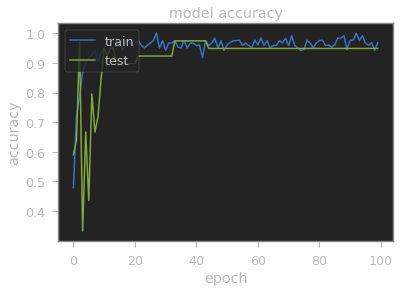

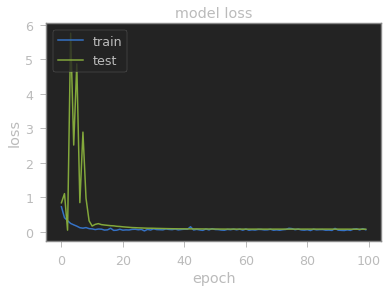

In [33]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Prediction

In [39]:
pred = model.predict(X_test)
pred = np.argmax(pred, axis=1)
y_true = np.argmax(y_test, axis=1)

Acurácia: 0.95


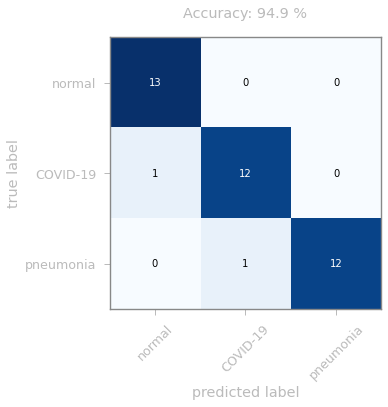

In [59]:
cm = confusion_matrix(y_true, pred)
acc = (cm[0, 0] + cm[1, 1] + cm[2,2]) / sum(sum(cm))

print(f"Acurácia: {round(acc, 2)}")

class_names = [ 'normal', 'COVID-19', 'pneumonia']

from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5), class_names=class_names)
plt.title(f'Accuracy: {round(100 * acc, 1)} %')
plt.show()